In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

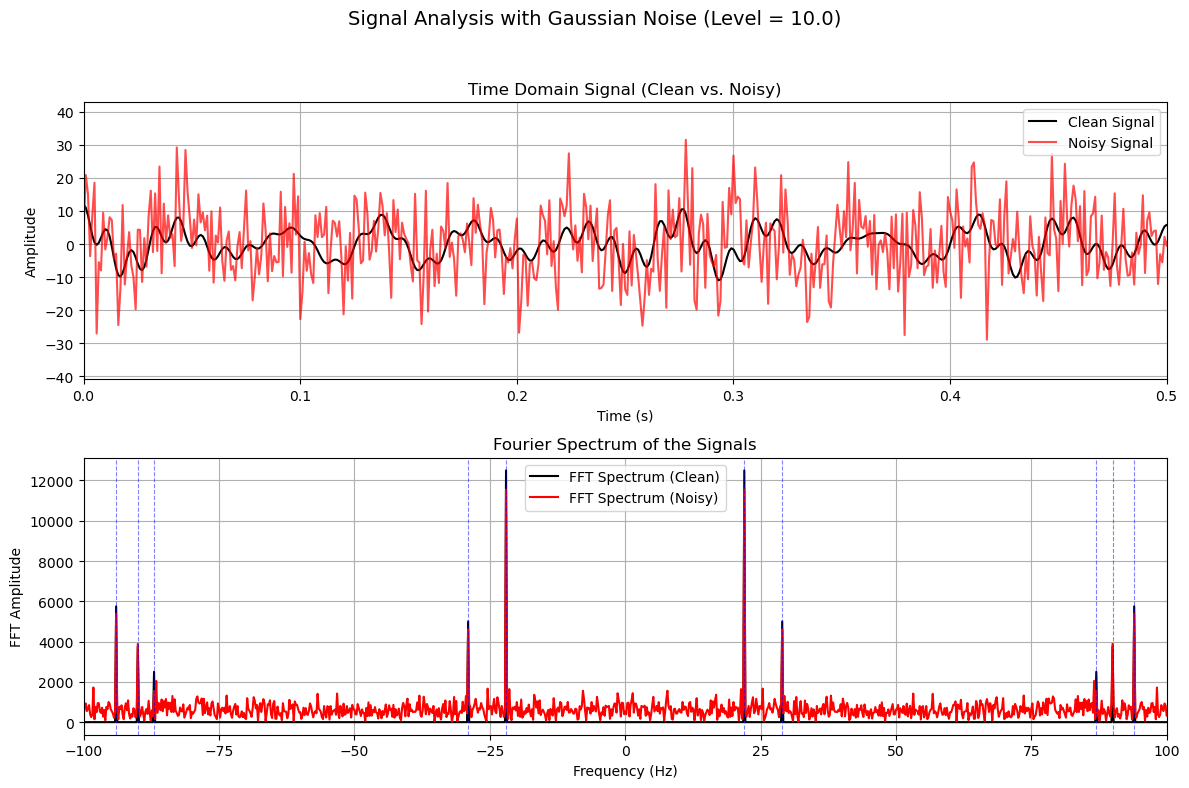

In [6]:
# SIGNAL PARAMETERS
Fs = 1000 # Sampling Frequency (Hz)
T = 5.0 # Signal Duration (seconds)
N = int(Fs*T) # Total number of samples

# Time - From 0.0 to T
t = np.linspace(0.0, T, N, endpoint=False) 

# Define signal function

coef = [5.0, 2.0, 1.0, 1.5, 2.3]
freqs = [22, 29, 87, 90, 94] 

def signal(t, coef, freqs):
    x = np.zeros_like(t)
    for i in range(len(freqs)):
        x += coef[i]*np.cos(2*np.pi*freqs[i]*t)
    return x

signal_original = signal(t, coef, freqs) # Signal without noise

# ADDING NOISE

NOISE_LEVEL = 10.0 
noise = NOISE_LEVEL*np.random.randn(N) # Noise with gaussian distribution

signal_noisy = signal_original + noise # Signal with noise

# COMPUTING FFT

fft = np.fft.fft(signal_original) # FFT of the original signal
fft_noisy = np.fft.fft(signal_noisy) # FFT of the noisy signal
freqs_fft = np.fft.fftfreq(N, 1 / Fs) # Frequencies of the FFT

# Shiftting FFT only for a better visualization
fft_shifted = np.fft.fftshift(fft)
fft_noisy_shifted = np.fft.fftshift(fft_noisy)
freqs_shifted = np.fft.fftshift(freqs_fft)

# PLOTTING

plt.figure(figsize=(12, 8))
plt.suptitle(f'Signal Analysis with Gaussian Noise (Level = {NOISE_LEVEL:.1f})', fontsize = 14)

# Plot Original Signal and Noisy Signal
plt.subplot(2, 1, 1)
plt.plot(t, signal_original, label = 'Clean Signal', color = 'black', alpha = 1.0)
plt.plot(t, signal_noisy, label = 'Noisy Signal', color = 'red', alpha=0.7)
plt.title('Time Domain Signal (Clean vs. Noisy)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim([0, 0.5]) # Zoom to see the signal pattern
plt.grid(True)
plt.legend(loc = 'upper right')

# Plot FFT for both signals
plt.subplot(2, 1, 2)
plt.plot(freqs_shifted, np.abs(fft_shifted), label='FFT Spectrum (Clean)', color='black', alpha = 1.0)
plt.plot(freqs_shifted, np.abs(fft_noisy_shifted), label='FFT Spectrum (Noisy)', color='red', alpha = 1.0)
for f in freqs:
    plt.axvline(f, color = 'blue', linestyle = '--', linewidth = 0.8, alpha = 0.5) #Plot of frequencies of interest
    plt.axvline(-f, color = 'blue', linestyle = '--', linewidth = 0.8, alpha = 0.5)

plt.title('Fourier Spectrum of the Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.grid(True)
plt.legend()
plt.xlim([-100, 100]) # Zoom on the frequencies of interest
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('noisy_signal_fft')
plt.show()




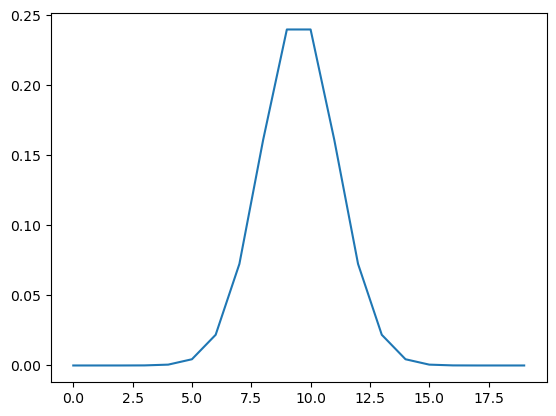

In [3]:
# FILTERING WITH RECTANGULAR SHAPED WEIGHT FUNCTION

window_width = 0.02  # Window width (s) - 20ms
window_width_samples = int(Fs*window_width)

kernel_rect = np.ones(window_width_samples)/window_width_samples # Rectangular weight function

# Applying convolution (filtering)
signal_filtered_rect = convolve(signal_noisy, kernel_rect, mode = 'same')

# FILTERING WITH GAUSSIAN SHAPED WEIGHT FUNCTION

# Gaussian Kernel Function
def gaussian_kernel(width_samples, sigma):
    x = np.linspace(-width_samples//2, width_samples//2, width_samples)
    kernel = np.exp(-(x**2) / (2 * sigma**2))
    return kernel / np.sum(kernel) # Normalized Gaussian Kernel

sigma_samples = window_width_samples/12
kernel_gauss = gaussian_kernel(window_width_samples, sigma_samples) # Gaussian Kernel 

# Applying convolution (filtering)
signal_filtered_gauss = convolve(signal_noisy, kernel_gauss, mode = 'same')

plt.plot(kernel_gauss)

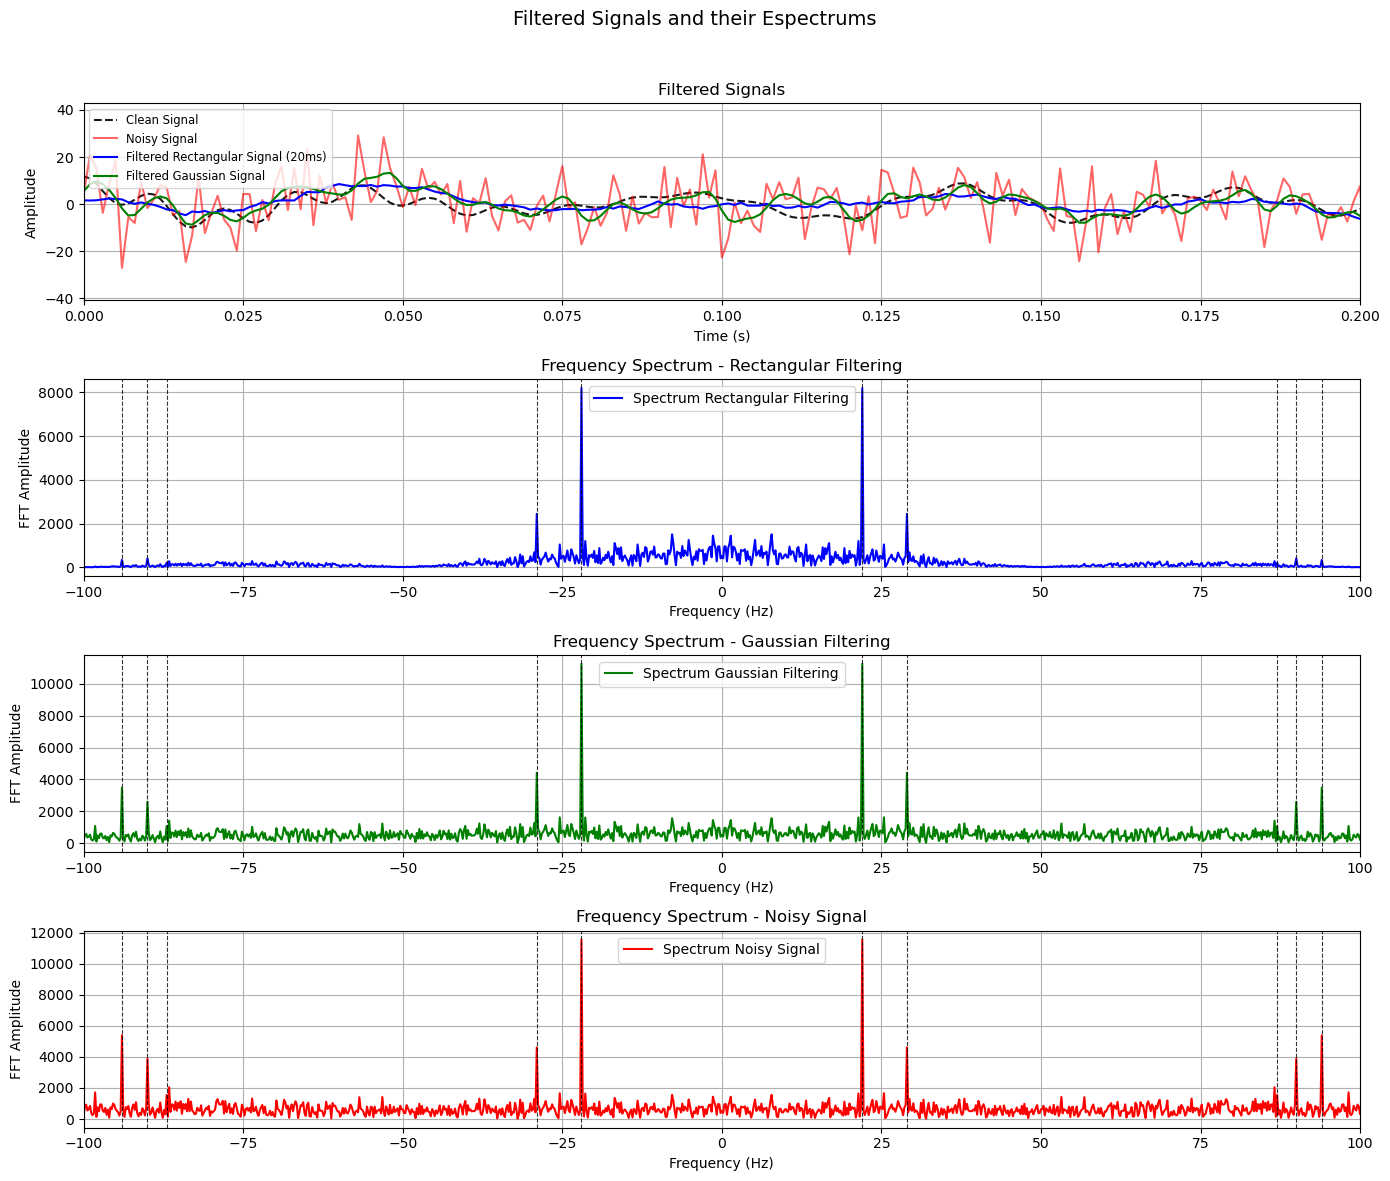

In [8]:
# FILTERING WITH RECTANGULAR SHAPED WEIGHT FUNCTION

window_width = 0.02  # Window width (s) - 20ms
window_width_samples = int(Fs*window_width)

kernel_rect = np.ones(window_width_samples)/window_width_samples # Rectangular weight function

# Applying convolution (filtering)
signal_filtered_rect = convolve(signal_noisy, kernel_rect, mode = 'same')

# FILTERING WITH GAUSSIAN SHAPED WEIGHT FUNCTION

# Gaussian Kernel Function
def gaussian_kernel(width_samples, sigma):
    x = np.linspace(-width_samples//2, width_samples//2, width_samples)
    kernel = np.exp(-(x**2) / (2 * sigma**2))
    return kernel / np.sum(kernel) # Normalized Gaussian Kernel

sigma_samples = window_width_samples/12
kernel_gauss = gaussian_kernel(window_width_samples, sigma_samples) # Gaussian Kernel 

# Applying convolution (filtering)
signal_filtered_gauss = convolve(signal_noisy, kernel_gauss, mode = 'same')

# COMPUTING FOURIER TRANSFORMS 

# FFT for the rectangular filtered signal
fft_rect = np.fft.fft(signal_filtered_rect)
fft_rect_shifted = np.fft.fftshift(fft_rect) # Shifted only for a better visualization

# FFT for the gaussian filtered signal
fft_gauss = np.fft.fft(signal_filtered_gauss)
fft_gauss_shifted = np.fft.fftshift(fft_gauss) # Shifted only for a better visualization

# # Frecuencias (se utiliza el mismo freqs_shifted que el espectro ruidoso)
# freqs_fft = np.fft.fftfreq(N, 1 / Fs)
# freqs_shifted = np.fft.fftshift(freqs_fft)

# PLOTTING

plt.figure(figsize=(14, 12))
plt.suptitle('Filtered Signals and their Espectrums', fontsize=14)

# Plot filtered signals
plt.subplot(4, 1, 1)
plt.plot(t, signal_original, label = 'Clean Signal', color='black', linestyle='--', alpha=0.9)
plt.plot(t, signal_noisy, label = 'Noisy Signal', color = 'red', alpha = 0.6)
plt.plot(t, signal_filtered_rect, label = 'Filtered Rectangular Signal (20ms)', color = 'blue', linewidth = 1.5)
plt.plot(t, signal_filtered_gauss, label = 'Filtered Gaussian Signal', color = 'green', linewidth = 1.5)
plt.title('Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim([0.0, 0.2]) # Zoom to appreciate the filtering
plt.grid(True)
plt.legend(loc='upper left', fontsize = 'small')

# Spectrum for Rectangular Filtering
plt.subplot(4, 1, 2)
plt.plot(freqs_shifted, np.abs(fft_rect_shifted), label = 'Spectrum Rectangular Filtering', color = 'blue')
for f in freqs:
    plt.axvline(f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8) #Plot of frequencies of interest
    plt.axvline(-f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8)
plt.title('Frequency Spectrum - Rectangular Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.xlim([-100, 100])
plt.grid(True)
plt.legend()

# Spectrum for Rectangular Filtering
plt.subplot(4, 1, 3)
plt.plot(freqs_shifted, np.abs(fft_gauss_shifted), label = 'Spectrum Gaussian Filtering', color = 'green')
for f in freqs:
    plt.axvline(f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8) #Plot of frequencies of interest
    plt.axvline(-f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8)
plt.title('Frequency Spectrum - Gaussian Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.xlim([-100, 100])
plt.grid(True)
plt.legend()

# Spectrum for Rectangular Filtering
plt.subplot(4, 1, 4)
plt.plot(freqs_shifted, np.abs(fft_noisy_shifted), label = 'Spectrum Noisy Signal', color = 'red')
for f in freqs:
    plt.axvline(f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8) #Plot of frequencies of interest
    plt.axvline(-f, color = 'black', linestyle = '--', linewidth = 0.8, alpha = 0.8)
plt.title('Frequency Spectrum - Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.xlim([-100, 100])
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('filtering_comparision')
plt.show()